# Task 01

## CODESOFT

## Data Science

In [11]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#import dataset
df = pd.read_csv('D:/data/DM & BI Course/VI Assignment/advertising.csv')

In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
df.shape

(200, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Exploratory Data Analysis

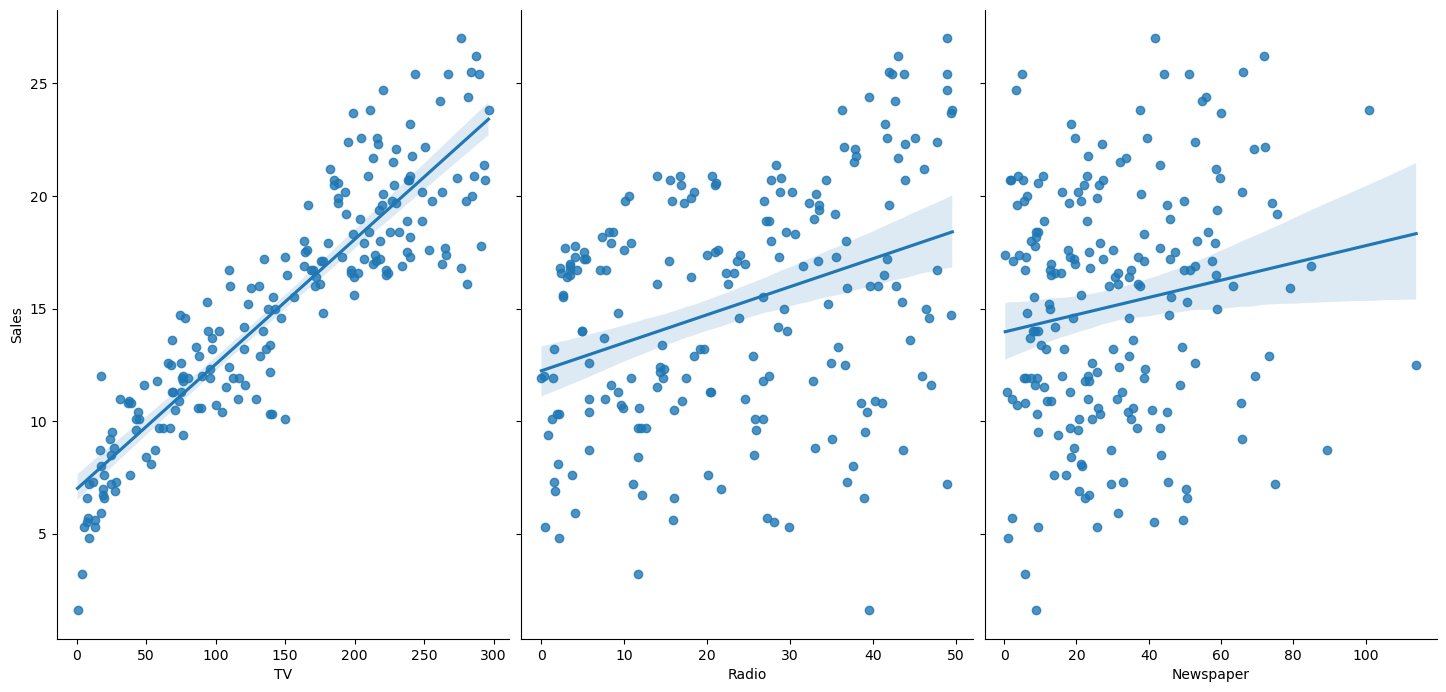

In [16]:
import seaborn as sns
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7,aspect=0.7, kind = 'reg')

In [18]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

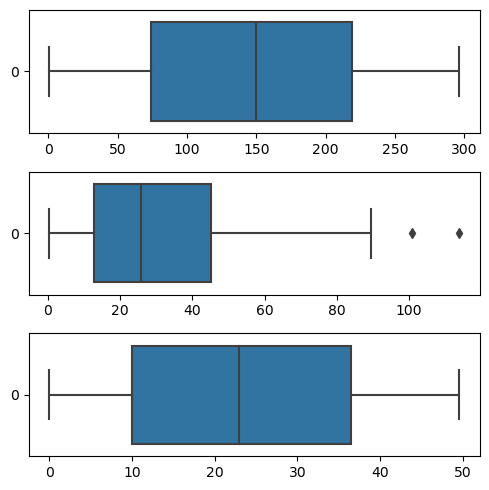

In [21]:
# using box plot find outlier
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0], orient = 'h')
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1], orient = 'h')
plt3 = sns.boxplot(df['Radio'], ax = axs[2], orient = 'h')
plt.tight_layout()

# Finding IQR

In [24]:
q1 = df['Newspaper'].quantile(0.25)
q3 = df['Newspaper'].quantile(0.75)
print('percentile 25%',q1)
print('percentile 75%',q3)

percentile 25% 12.75
percentile 75% 45.1


In [25]:
iqr = q3 -q1
iqr

32.35

# Finding upper Limit and Lower Limit

In [26]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower Limit', lower_limit)
print('Upper Limit', upper_limit)

Lower Limit -35.775000000000006
Upper Limit 93.625


In [27]:
df[df['Newspaper'] < lower_limit].count()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [28]:
df[df['Newspaper'] > upper_limit].count()

TV           2
Radio        2
Newspaper    2
Sales        2
dtype: int64

In [31]:
df[df['Newspaper'] > upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


# Trimming Outliers

In [34]:
new_df = df[(df['Newspaper'] > lower_limit) & (df['Newspaper'] < upper_limit)]
new_df.shape

(198, 4)

# Checking for Outliers again

<Axes: >

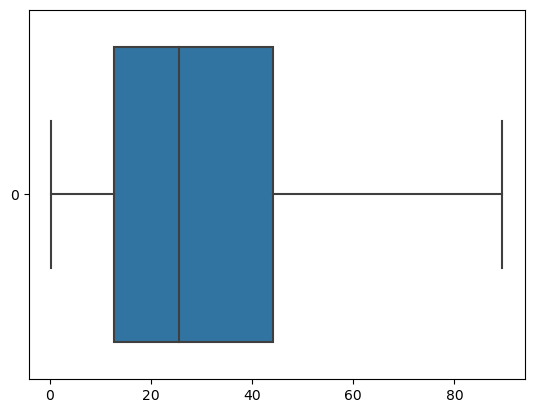

In [37]:
sns.boxplot(new_df['Newspaper'], orient = 'h')

Outliers have been removed now

# Generating heatmap for correlation 

<Axes: >

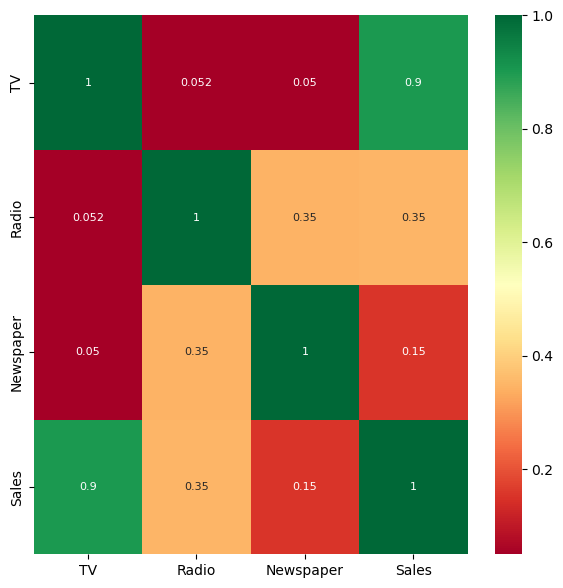

In [38]:
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (7,7))

sns.heatmap(new_df[top_corr_features].corr(), annot= True, cmap = 'RdYlGn', annot_kws = {'fontsize': 8})

# Training the Model

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = new_df[['TV','Radio','Newspaper']]
y = new_df['Sales']
# split data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

from sklearn.linear_model import LinearRegression

# instantiate model
model = LinearRegression()
# fit model
model.fit(X_train,y_train)

LinearRegression()

# Predicting

In [41]:
y_pred = model.predict(X_test)

In [42]:
y=pd.DataFrame({'Original':y_test,'Predicted':y_pred})
y.head()

,Original,Predicted
177,16.7,14.898954
41,17.1,18.013015
35,17.8,21.608290
91,7.3,6.100054
147,25.4,23.453514


<Axes: >

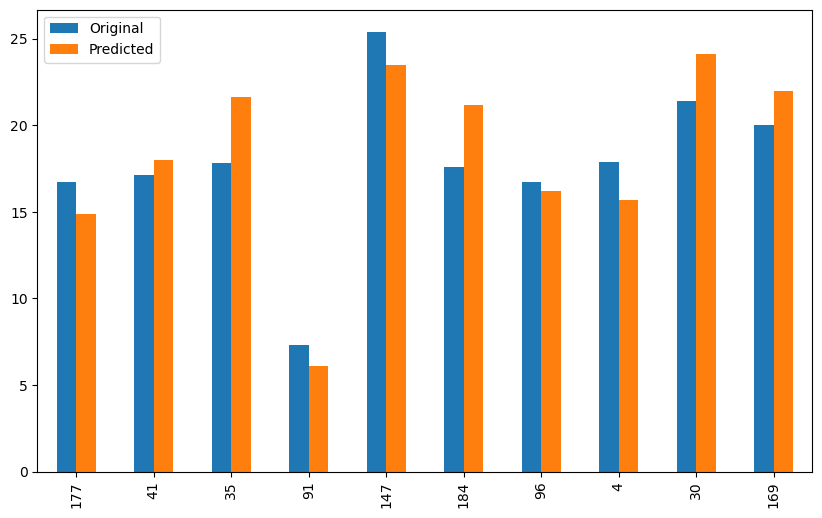

In [43]:
y.head(10).plot(kind = 'bar', figsize = (10,6))

In [44]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics

In [45]:
print('Evaluation indicators')
print("MAE:\t", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:\t", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:\t",  metrics.mean_squared_error(y_test, y_pred)**(0.5))
print("R-Squared:", metrics.r2_score(y_test, y_pred))

Evaluation indicators
MAE:	 1.4201547119405786
MSE:	 3.3509918635135145
RMSE:	 1.8305714581828032
R-Squared: 0.8737705483710846


# By Taking the column with only highest correlation i.e 'TV' we extracted the following evaluation indicators

Evaluation indicators
MAE:	 1.7997414406582928
MSE:	 5.7099404502015005
RMSE:	 2.389548168629689
R-Squared: 0.7849106529590382